In [1]:
import pandas as pd
import numpy as np
from cytoolz import *

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split

from gensim.matutils import Sparse2Corpus
from gensim.models.wrappers import LdaVowpalWabbit

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
vwpath = '/usr/local/bin/vw'

In [3]:
posts = pd.read_msgpack('conspiracy-100k.dat')
posts = list(posts['tokens'])

In [4]:
V = CountVectorizer(analyzer=lambda d:[t.lower() for t in d if t.isalpha() 
                                                   and t.lower() not in ENGLISH_STOP_WORDS], 
                    min_df=20, max_df=0.75)
X = V.fit_transform(posts)
Xtrain, Xtest = train_test_split(X, test_size=0.1, shuffle=True)

In [5]:
vocab = dict((v,k) for (k,v) in V.vocabulary_.items())
corpus = Sparse2Corpus(X, documents_columns=False)
train_corpus = Sparse2Corpus(Xtrain, documents_columns=False)
test_corpus = Sparse2Corpus(Xtest, documents_columns=False)

In [17]:
models1 = [ ]
for k in range(10,151,10):
    models1.append(LdaVowpalWabbit(vwpath, train_corpus, id2word=vocab, 
                                  alpha=1/k, eta=0.1, num_topics=k))

In [18]:
models2 = [ ]
for k in range(10,151,10):
    models2.append(LdaVowpalWabbit(vwpath, train_corpus, id2word=vocab, 
                                  alpha=5/k, eta=0.1, num_topics=k))

In [25]:
models3 = [ ]
for k in range(10,151,10):
    models3.append(LdaVowpalWabbit(vwpath, train_corpus, id2word=vocab, 
                                  alpha=0.1/k, eta=0.1, num_topics=k))

In [21]:
x1 = [m.num_topics for m in models1]
y1 = [np.exp2(-m.log_perplexity(test_corpus)) for m in models1]

In [19]:
x2 = [m.num_topics for m in models2]
y2 = [np.exp2(-m.log_perplexity(test_corpus)) for m in models2]

In [26]:
x3 = [m.num_topics for m in models3]
y3 = [np.exp2(-m.log_perplexity(test_corpus)) for m in models3]

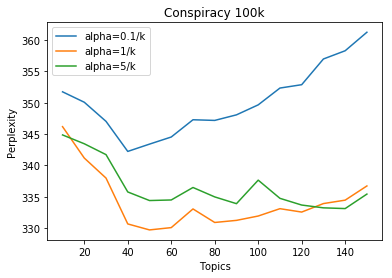

In [27]:
plt.plot(x3,y3,label='alpha=0.1/k')
plt.plot(x1,y1,label='alpha=1/k')
plt.plot(x2,y2,label='alpha=5/k')
plt.legend()
plt.xlabel('Topics')
plt.ylabel('Perplexity')
plt.title('Conspiracy 100k')